<a href="https://colab.research.google.com/github/gkpatell/INDE-577-Final-Project/blob/main/Supervised%20Learning/Neural%20Networks/SL_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# dataset @ https://www.nasdaq.com/market-activity/stocks/msft/historical?page=1&rows_per_page=10&timeline=y10

In [ ]:
import pandas as pd

df = pd.read_csv('MSFT.csv')
df

,Date,Close/Last,Volume,Open,High,Low
0,12/05/2024,$442.62,21697780,$437.92,$444.66,$436.171
1,12/04/2024,$437.42,26009430,$433.03,$439.67,$432.63
2,12/03/2024,$431.20,18301990,$429.84,$432.47,$427.74
3,12/02/2024,$430.98,20207220,$421.57,$433.00,$421.31
4,11/29/2024,$423.46,16271920,$420.09,$424.8849,$417.80
...,...,...,...,...,...,...
2512,12/11/2014,$47.17,29060360,$47.08,$47.74,$46.68
2513,12/10/2014,$46.90,30284690,$47.58,$47.66,$46.7001
2514,12/09/2014,$47.59,24326090,$47.11,$47.92,$47.05
2515,12/08/2014,$47.695,26652610,$48.26,$48.35,$47.445


In [ ]:
df = df[['Date', 'Close/Last']]
df

,Date,Close/Last
0,12/05/2024,$442.62
1,12/04/2024,$437.42
2,12/03/2024,$431.20
3,12/02/2024,$430.98
4,11/29/2024,$423.46
...,...,...
2512,12/11/2014,$47.17
2513,12/10/2014,$46.90
2514,12/09/2014,$47.59
2515,12/08/2014,$47.695


In [ ]:
df['Date']

,Date
0,12/05/2024
1,12/04/2024
2,12/03/2024
3,12/02/2024
4,11/29/2024
...,...
2512,12/11/2014
2513,12/10/2014
2514,12/09/2014
2515,12/08/2014


In [ ]:
import datetime

def str_to_datetime(s):
    split = s.split('/')
    month, day, year = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('01/01/2022')
datetime_object

datetime.datetime(2022, 1, 1, 0, 0)

In [ ]:
df

,Date,Close/Last
0,12/05/2024,$442.62
1,12/04/2024,$437.42
2,12/03/2024,$431.20
3,12/02/2024,$430.98
4,11/29/2024,$423.46
...,...,...
2512,12/11/2014,$47.17
2513,12/10/2014,$46.90
2514,12/09/2014,$47.59
2515,12/08/2014,$47.695


In [ ]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-7-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


,Date
0,2024-12-05
1,2024-12-04
2,2024-12-03
3,2024-12-02
4,2024-11-29
...,...
2512,2014-12-11
2513,2014-12-10
2514,2014-12-09
2515,2014-12-08


In [ ]:
df.index = df.pop('Date')
df

,Close/Last
Date,
2024-12-05,$442.62
2024-12-04,$437.42
2024-12-03,$431.20
2024-12-02,$430.98
2024-11-29,$423.46
...,...
2014-12-11,$47.17
2014-12-10,$46.90
2014-12-09,$47.59


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2024-12-05 to 2014-12-05
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Close/Last  2517 non-null   object
dtypes: object(1)
memory usage: 39.3+ KB
None


In [ ]:
df['Close/Last'] = df['Close/Last'].replace({'\$': '', ',': ''}, regex=True).astype(float)

<ipython-input-10-5cf336a32f7f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close/Last'] = df['Close/Last'].replace({'\$': '', ',': ''}, regex=True).astype(float)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2024-12-05 to 2014-12-05
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close/Last  2517 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB
None


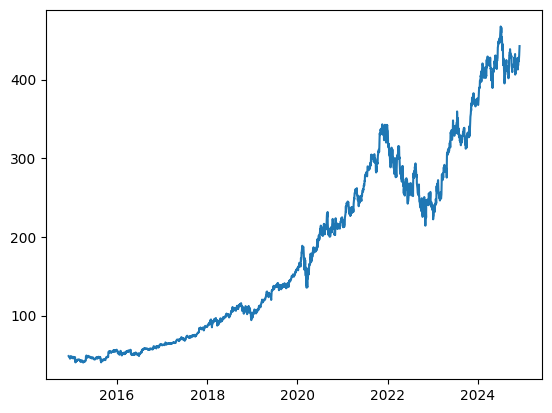

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close/Last'])

In [ ]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window od size {n} is too large for date {target_date}')
      return

    values = df_subset['Close/Last'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date + datetime.timedelta(days=7)]
    if next_week.empty:
      print(f"No more data after {target_date}")
      break

    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]  # Ensure the format matches your index
    year, month, day = map(int, next_date_str.split('-'))  # Split correctly for 'YYYY-MM-DD'
    next_date = datetime.datetime(year=year, month=month, day=day)


    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates

    X = np.array(X)
    for i in range(0, n):
      X[:, i]
      ret_df[f'Target-{n-i}'] = X[:, i]

    ret_df['Target'] = Y

    return ret_df

  # Start day second time around: '2021-03-25'
  windowed_df = df_to_windowed_df(df,
                                  '2021-03-25',
                                  '2022-03-23',
                                  n=3)
  windowed_df

In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

NameError: name 'windowed_df' is not defined